In [1]:
import numpy as np
import pandas as pd
from datetime import datetime
from matplotlib import pyplot as plt

### Load the dataset

In [2]:
# read the dataset
df = pd.read_csv('../data/raw_csv.csv')
df.head()

,id,storeId,storeName,title,rating,lunchTime,category,postCategory,sold,price,discount,shippingCost,imageUrl,storeUrl,category_name,category_id,type
0,1005002508947205,900250272,IDEACH Official Store,Wireless Handheld Vacuum Cleaner 10kPa 150W Po...,4.8,2021-04-19 00:00:00,NaN,608,1487 sold,464.16,76,0.0,//ae01.alicdn.com/kf/S29307438fb224285b2981d71...,//www.aliexpress.com/store/900250272,home-appliances,6,natural
1,1005004546160959,5379102,Factory Direct Collected Store,Portable Water Drop Humidifier USB Desktop Ind...,4.8,2022-07-19 00:00:00,NaN,625,5348 sold,22.28,54,0.0,//ae01.alicdn.com/kf/S8d4807ce10bd4152850ec872...,//www.aliexpress.com/store/5379102,home-appliances,6,natural
2,1005004967489874,911794975,HOMDD Specialty Store,Portable Desktop Instant Automatic Multi-Speed...,0.0,2022-11-17 00:00:00,NaN,610,1 sold,251.76,25,0.0,//ae01.alicdn.com/kf/Sdae1fa83cf1a482397b6e061...,//www.aliexpress.com/store/911794975,home-appliances,6,natural
3,1005003601452827,912652146,XINGHUO ONLINE Store,Portable 420ml Air Humidifier Aroma Oil Humidi...,4.7,2021-11-24 00:00:00,NaN,625,2979 sold,8.95,84,0.0,//ae01.alicdn.com/kf/Se200f7a404974c87b5941587...,//www.aliexpress.com/store/912652146,home-appliances,6,natural
4,33022569739,4991203,ABIR Official Store,ABIR X6 Robot Vacuum Cleaner Visual Navigatio...,4.7,2019-05-24 00:00:00,NaN,608,2103 sold,775.35,59,0.0,//ae01.alicdn.com/kf/Scfe6fa94f0644aaabff79c0f...,//www.aliexpress.com/store/4991203,home-appliances,6,ad


## Clean data

In [3]:
# get a count of nan values
nan_counts = df.isna().sum()
print(nan_counts)

id                    0
storeId               0
storeName             0
title                 0
rating                0
lunchTime             0
category         864270
postCategory          0
sold                  0
price                 0
discount              0
shippingCost      66198
imageUrl              0
storeUrl              0
category_name         0
category_id           0
type                  0
dtype: int64


#### Remove unnecessary columns
If we look at the table above we will see that we need to remove 'category' feature because it has only NaN values. We also need to remove Url-related features because they give no useful data for us. The id is a unique number for each instance of the table, so we are going to remove it as well

In [4]:
df = df.drop(columns=['category','imageUrl','storeUrl', 'id'])
df.head()

,storeId,storeName,title,rating,lunchTime,postCategory,sold,price,discount,shippingCost,category_name,category_id,type
0,900250272,IDEACH Official Store,Wireless Handheld Vacuum Cleaner 10kPa 150W Po...,4.8,2021-04-19 00:00:00,608,1487 sold,464.16,76,0.0,home-appliances,6,natural
1,5379102,Factory Direct Collected Store,Portable Water Drop Humidifier USB Desktop Ind...,4.8,2022-07-19 00:00:00,625,5348 sold,22.28,54,0.0,home-appliances,6,natural
2,911794975,HOMDD Specialty Store,Portable Desktop Instant Automatic Multi-Speed...,0.0,2022-11-17 00:00:00,610,1 sold,251.76,25,0.0,home-appliances,6,natural
3,912652146,XINGHUO ONLINE Store,Portable 420ml Air Humidifier Aroma Oil Humidi...,4.7,2021-11-24 00:00:00,625,2979 sold,8.95,84,0.0,home-appliances,6,natural
4,4991203,ABIR Official Store,ABIR X6 Robot Vacuum Cleaner Visual Navigatio...,4.7,2019-05-24 00:00:00,608,2103 sold,775.35,59,0.0,home-appliances,6,ad


#### Clean the "sold" column by converting values into integers 

In [5]:
# Sold column looks like sold count + string "sold". We want to leave only the number
def clean_sold(sold_data: str) -> int:
    try:
        sold_count, _ = str.split(sold_data)
    except ValueError:
        sold_count = sold_data
    return int(sold_count)

df['sold'] = df['sold'].apply(clean_sold)
df.head()

,storeId,storeName,title,rating,lunchTime,postCategory,sold,price,discount,shippingCost,category_name,category_id,type
0,900250272,IDEACH Official Store,Wireless Handheld Vacuum Cleaner 10kPa 150W Po...,4.8,2021-04-19 00:00:00,608,1487,464.16,76,0.0,home-appliances,6,natural
1,5379102,Factory Direct Collected Store,Portable Water Drop Humidifier USB Desktop Ind...,4.8,2022-07-19 00:00:00,625,5348,22.28,54,0.0,home-appliances,6,natural
2,911794975,HOMDD Specialty Store,Portable Desktop Instant Automatic Multi-Speed...,0.0,2022-11-17 00:00:00,610,1,251.76,25,0.0,home-appliances,6,natural
3,912652146,XINGHUO ONLINE Store,Portable 420ml Air Humidifier Aroma Oil Humidi...,4.7,2021-11-24 00:00:00,625,2979,8.95,84,0.0,home-appliances,6,natural
4,4991203,ABIR Official Store,ABIR X6 Robot Vacuum Cleaner Visual Navigatio...,4.7,2019-05-24 00:00:00,608,2103,775.35,59,0.0,home-appliances,6,ad


In [6]:
# Translate the timestamp to year, month, and day
df['year'] = df['lunchTime'].apply(lambda date: datetime.strptime(date.split()[0], '%Y-%m-%d').year)
df['month'] = df['lunchTime'].apply(lambda date: datetime.strptime(date.split()[0], '%Y-%m-%d').month)
df['day'] = df['lunchTime'].apply(lambda date: datetime.strptime(date.split()[0], '%Y-%m-%d').day)

# Drop the launch time column
df = df.drop(columns=['lunchTime'])

df.head()

,storeId,storeName,title,rating,postCategory,sold,price,discount,shippingCost,category_name,category_id,type,year,month,day
0,900250272,IDEACH Official Store,Wireless Handheld Vacuum Cleaner 10kPa 150W Po...,4.8,608,1487,464.16,76,0.0,home-appliances,6,natural,2021,4,19
1,5379102,Factory Direct Collected Store,Portable Water Drop Humidifier USB Desktop Ind...,4.8,625,5348,22.28,54,0.0,home-appliances,6,natural,2022,7,19
2,911794975,HOMDD Specialty Store,Portable Desktop Instant Automatic Multi-Speed...,0.0,610,1,251.76,25,0.0,home-appliances,6,natural,2022,11,17
3,912652146,XINGHUO ONLINE Store,Portable 420ml Air Humidifier Aroma Oil Humidi...,4.7,625,2979,8.95,84,0.0,home-appliances,6,natural,2021,11,24
4,4991203,ABIR Official Store,ABIR X6 Robot Vacuum Cleaner Visual Navigatio...,4.7,608,2103,775.35,59,0.0,home-appliances,6,ad,2019,5,24


# TODO
3) rating value counts
3) launch time remove time stamp
5) fulfil shipping cost with mean
6) remove category_id because it is related to category name
7) store name???


## Data description & exploration

In [7]:
df.describe()

,storeId,rating,postCategory,sold,price,discount,shippingCost,category_id,year,month,day
count,8.642700e+05,864270.000000,8.642700e+05,864270.000000,864270.000000,864270.000000,7.980720e+05,8.642700e+05,864270.000000,864270.000000,864270.000000
mean,5.226033e+08,2.272654,1.229935e+08,81.911017,221.446306,30.898451,9.102355e+01,1.387867e+08,2021.348286,7.541136,16.279225
std,4.956751e+08,2.404211,8.922083e+07,808.134823,2297.688077,19.992854,6.154509e+03,8.237863e+07,1.209375,3.073709,8.638346
min,1.000300e+04,0.000000,1.450000e+02,0.000000,0.010000,0.000000,0.000000e+00,5.000000e+00,2008.000000,1.000000,1.000000
25%,4.291033e+06,0.000000,3.806100e+05,0.000000,13.942500,15.000000,0.000000e+00,1.000016e+08,2021.000000,5.000000,9.000000
50%,9.104512e+08,0.000000,2.000003e+08,3.000000,38.340000,32.000000,1.220000e+01,2.000021e+08,2022.000000,8.000000,16.000000
75%,9.125601e+08,5.000000,2.000039e+08,19.000000,110.640000,48.000000,2.235000e+01,2.002153e+08,2022.000000,10.000000,24.000000
max,1.102528e+09,5.000000,2.018986e+08,121131.000000,976428.200000,99.000000,2.896137e+06,2.060891e+08,2022.000000,12.000000,31.000000


In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 864270 entries, 0 to 864269
Data columns (total 15 columns):
 #   Column         Non-Null Count   Dtype  
---  ------         --------------   -----  
 0   storeId        864270 non-null  int64  
 1   storeName      864270 non-null  object 
 2   title          864270 non-null  object 
 3   rating         864270 non-null  float64
 4   postCategory   864270 non-null  int64  
 5   sold           864270 non-null  int64  
 6   price          864270 non-null  float64
 7   discount       864270 non-null  int64  
 8   shippingCost   798072 non-null  float64
 9   category_name  864270 non-null  object 
 10  category_id    864270 non-null  int64  
 11  type           864270 non-null  object 
 12  year           864270 non-null  int64  
 13  month          864270 non-null  int64  
 14  day            864270 non-null  int64  
dtypes: float64(3), int64(8), object(4)
memory usage: 98.9+ MB


In [9]:
df.nunique()

storeId           99362
storeName         99468
title            595296
rating               41
postCategory       3186
sold               4923
price             59308
discount            100
shippingCost      16016
category_name       325
category_id         325
type                  2
year                 15
month                12
day                  31
dtype: int64

#### Categories of the features with description
- Text:
    - storeName: name of the store
    - title: description of the product
- Numerical:
    - rating: rating of the product from 0 to 5
    - sold: number of times the product was sold
    - price: price after applying the discount in SAR (1SAR ~= 0.27USD)
    - discount: discount percentage of the product Price in between 0-100
    - shippingCost: Shipping Cost to Saudi Arabia in SAR
- Categorical
    - postCategory: probably, related to delivery
    - category_name: category the product is in
    - category_id: id of the category
    - type: either ad (Advertised) or natural (not Advertised)
- Time
    - year
    - month
    - day
    

#### Data distribution (Bivariate analysis)

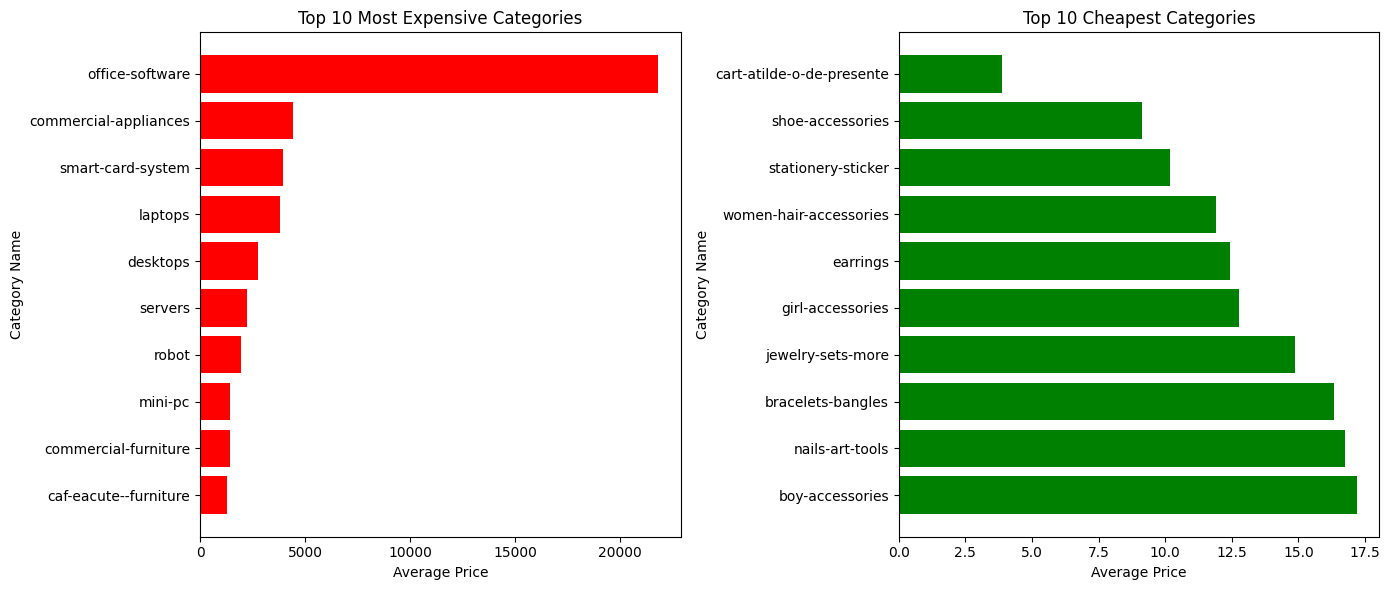

In [10]:
average_price = df.groupby('category_name')['price'].mean().reset_index()

most_expensive = average_price.sort_values(by='price', ascending=False).head(10)

cheapest = average_price.sort_values(by='price', ascending=True).head(10)

plt.figure(figsize=(14, 6))
plt.subplot(1, 2, 1)
plt.barh(most_expensive['category_name'], most_expensive['price'], color='red')
plt.xlabel('Average Price')
plt.ylabel('Category Name')
plt.title('Top 10 Most Expensive Categories')
plt.gca().invert_yaxis()  

plt.subplot(1, 2, 2)
plt.barh(cheapest['category_name'], cheapest['price'], color='green')
plt.xlabel('Average Price')
plt.ylabel('Category Name')
plt.title('Top 10 Cheapest Categories')
plt.gca().invert_yaxis()

plt.tight_layout()
plt.show()

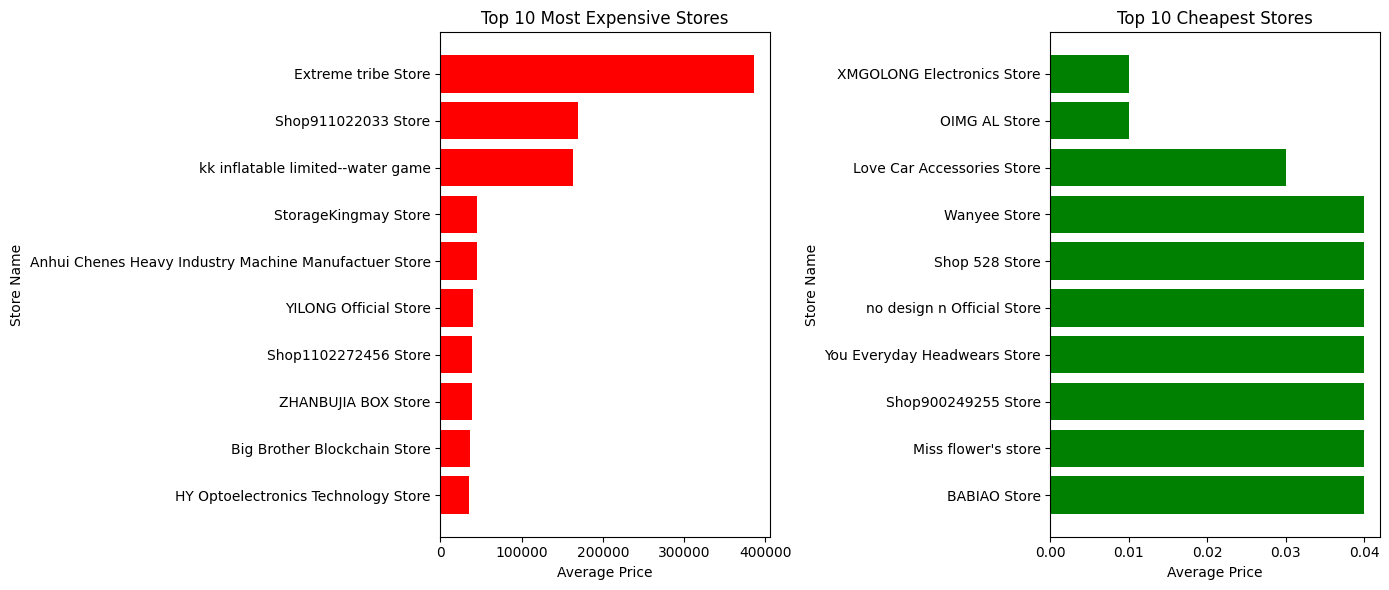

In [11]:
average_price = df.groupby('storeName')['price'].mean().reset_index()

most_expensive = average_price.sort_values(by='price', ascending=False).head(10)

cheapest = average_price.sort_values(by='price', ascending=True).head(10)

plt.figure(figsize=(14, 6))
plt.subplot(1, 2, 1)
plt.barh(most_expensive['storeName'], most_expensive['price'], color='red')
plt.xlabel('Average Price')
plt.ylabel('Store Name')
plt.title('Top 10 Most Expensive Stores')
plt.gca().invert_yaxis()

plt.subplot(1, 2, 2)
plt.barh(cheapest['storeName'], cheapest['price'], color='green')
plt.xlabel('Average Price')
plt.ylabel('Store Name')
plt.title('Top 10 Cheapest Stores')
plt.gca().invert_yaxis()  

plt.tight_layout()
plt.show()

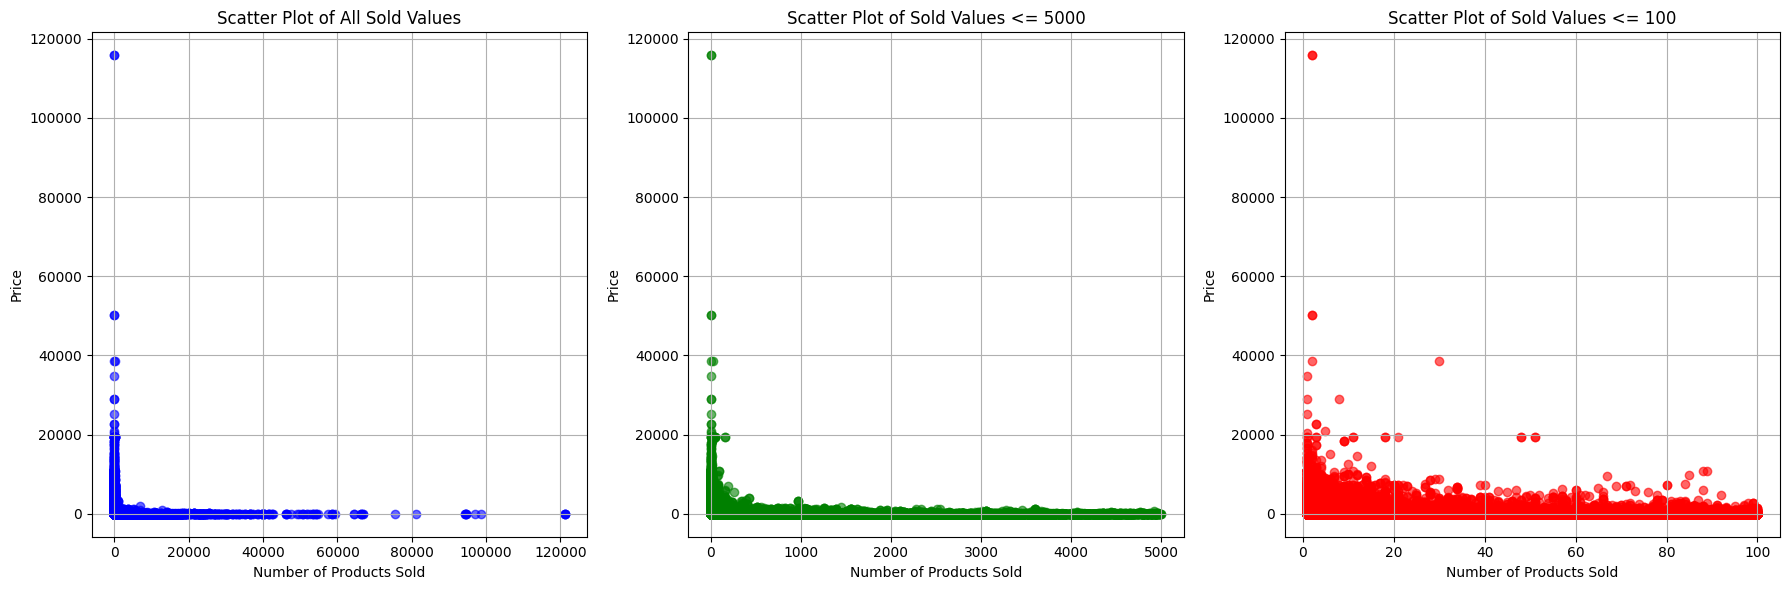

In [12]:
df_wo0 = df[df['sold'] != 0]

df_all = df_wo0
df_max_5000 = df_wo0[df_wo0['sold'] <= 5000]
df_max_100 = df_wo0[df_wo0['sold'] <= 100]
plt.figure(figsize=(18, 6))

plt.subplot(1, 3, 1)
plt.scatter(df_all['sold'], df_all['price'], color='blue', alpha=0.6)
plt.xlabel('Number of Products Sold')
plt.ylabel('Price')
plt.title('Scatter Plot of All Sold Values')
plt.grid(True)

plt.subplot(1, 3, 2)
plt.scatter(df_max_5000['sold'], df_max_5000['price'], color='green', alpha=0.6)
plt.xlabel('Number of Products Sold')
plt.ylabel('Price')
plt.title('Scatter Plot of Sold Values <= 5000')
plt.grid(True)

plt.subplot(1, 3, 3)
plt.scatter(df_max_100['sold'], df_max_100['price'], color='red', alpha=0.6)
plt.xlabel('Number of Products Sold')
plt.ylabel('Price')
plt.title('Scatter Plot of Sold Values <= 100')
plt.grid(True)

plt.tight_layout()
plt.show()

In [13]:
import matplotlib.pyplot as plt

Text(0, 0.5, 'Price')

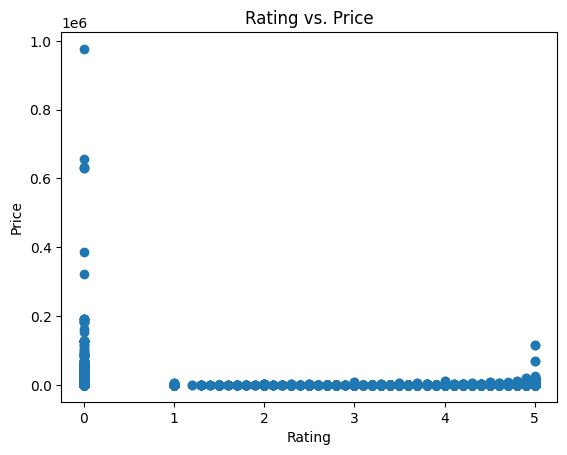

In [14]:
plt.scatter(df['rating'], df['price'])
plt.title("Rating vs. Price")
plt.xlabel("Rating")
plt.ylabel("Price")

Text(0, 0.5, 'Price')

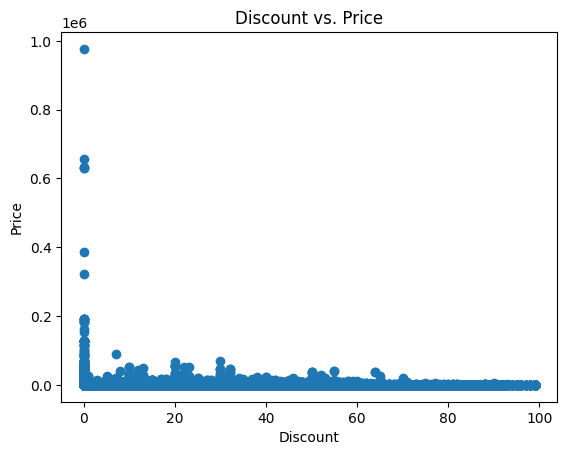

In [15]:
plt.scatter(df['discount'], df['price'])
plt.title("Discount vs. Price")
plt.xlabel("Discount")
plt.ylabel("Price")

Text(0, 0.5, 'Price')

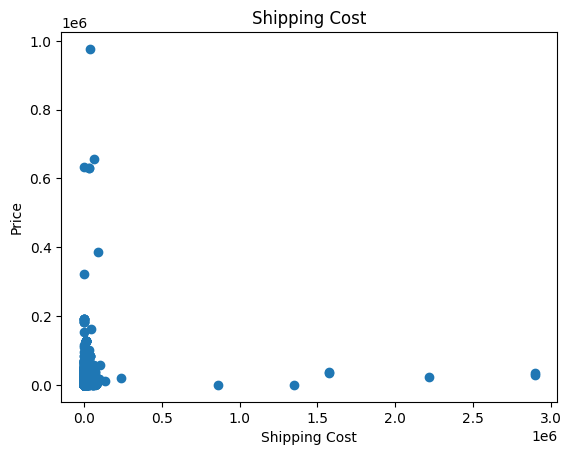

In [16]:
plt.scatter(df['shippingCost'], df['price'])
plt.title("Shipping Cost")
plt.xlabel("Shipping Cost")
plt.ylabel("Price")

Text(0, 0.5, 'Price')

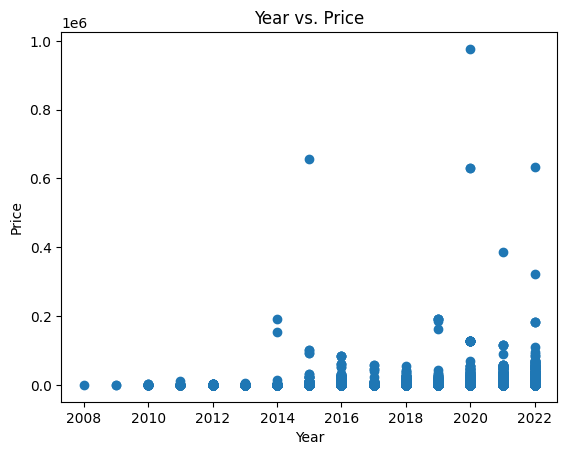

In [17]:
plt.scatter(df['year'], df['price'])
plt.title("Year vs. Price")
plt.xlabel("Year")
plt.ylabel("Price")

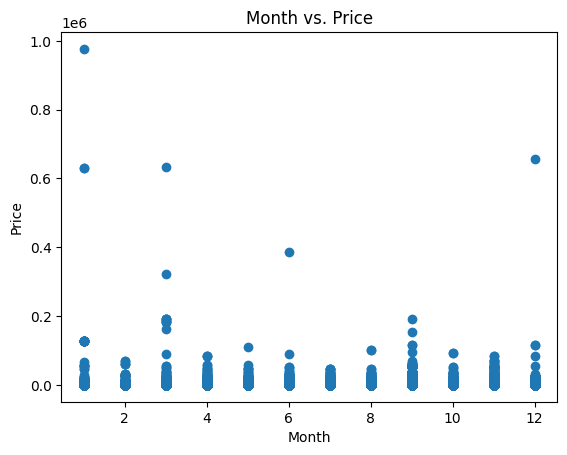

In [18]:
plt.scatter(df['month'], df['price'])
plt.title("Month vs. Price")
plt.xlabel("Month")
plt.ylabel("Price")
plt.show()

#### Conclusion
We can see no linear relationships between the features and the target, it suggests that methods relying on linear assumptions might not perform well

Potentially useful methods could be:
- Decision Trees and Ensembles
- SVM
- MLP

Potentially not useful methods:
- Linear regression

Preliminary list of features which may contribute to the performance of the ML model:
- categoryName/categoryId (each category has exemplary price window)
- storeName/storeId (each store may work for different categories)
- sold (there are weak inverse correlation between number of solded items and price)
- year (there are weak correlation between year and price)
- title (keywords that will make narrow view of the product)

## Data quality verification

In [19]:
df.isnull().sum()

storeId              0
storeName            0
title                0
rating               0
postCategory         0
sold                 0
price                0
discount             0
shippingCost     66198
category_name        0
category_id          0
type                 0
year                 0
month                0
day                  0
dtype: int64

In [20]:
# Let's impute the nan values in shippingCost with the mean value
mean_shipping_cost = df['shippingCost'].mean()
df.fillna({'shippingCost': mean_shipping_cost}, inplace=True)

In [21]:
# check the missing values again
df.isnull().sum()

storeId          0
storeName        0
title            0
rating           0
postCategory     0
sold             0
price            0
discount         0
shippingCost     0
category_name    0
category_id      0
type             0
year             0
month            0
day              0
dtype: int64

## Preliminary data transformation

In [26]:
from sklearn.model_selection import train_test_split
X = df.drop('price', axis=1)
X = X[['rating', 'sold', 'discount', 'shippingCost', 'year', 'month', 'day', 'category_name', 'type']]
y = df['price']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [37]:
df.head()
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.impute import SimpleImputer

# Column names
numerical_features = ['rating', 'sold', 'discount', 'shippingCost', 'year', 'month', 'day']
categorical_features = ['category_name', 'type']

# Define the transformers for numerical and categorical features
numerical_transformer = Pipeline(steps=[
    ('scaler', StandardScaler())  # Standardize numerical features
])

categorical_transformer = Pipeline(steps=[
    ('onehot', OneHotEncoder(handle_unknown='ignore'))  # Apply one-hot encoding
])

# Combine the transformers into a ColumnTransformer
preprocessor = ColumnTransformer(
    transformers=[
        ('num', numerical_transformer, numerical_features),
        ('cat', categorical_transformer, categorical_features)
    ]
)

# Create the pipeline with the preprocessor
pipeline = Pipeline(steps=[
    ('preprocessor', preprocessor)
])

# transforming the data
X_train_transformed = pipeline.fit_transform(X_train).toarray()
X_test_transformed = pipeline.transform(X_test).toarray()

## Simple POC

In [51]:
from sklearn.tree import DecisionTreeRegressor
regressor = DecisionTreeRegressor(random_state=0, max_depth=25)
regressor.fit(X_train_transformed, y_train)
y_pred = regressor.predict(X_test_transformed)
from sklearn.metrics import mean_absolute_error
mae = mean_absolute_error(y_test, y_pred)
print(f'mae: {mae}')

mae: 143.26802363181378
